<a href="https://colab.research.google.com/github/enjolimarie/Projects-in-AI-ML/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).
2. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model (cite your work if this other technique was not covered in class).
3. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1.

Task 1: Answer 1

To start, we must understand how to model the probability. Given a model and its target we have P(y=1|x) and we use the sigmoid function to create this classification. The sigmoid function, sigmoid(z), is written as  1/(1+e^-z), where z would then be the sum of the input features multiplied by their weights with an added bias.

I've read more about this from: https://medium.com/@ashisharora2204/logistic-regression-maximum-likelihood-estimation-gradient-descent-a7962a452332

With this understanding, the Likelihood Function can then be defined. It calculates the probability of observing the actual labels in the dataset. The basis of the formula is that the likelihood function accounts for the binary value of the target variable(of a class of0 or 1). So the formula follows the product of the sigma(z) to the y times 1 - the sigma(z) to the y-1. As stated before sigma z is the predicted probability and y is the target label from our dataset.

Now that the likelihood is formulated, we can then take the log liklihood. It then  if formulated  by obtaining the sum instead of taking the product. This formula follows as yi(log(sigma(z)^yi) plus (1-yi)log(1-(sigma(z)). The purpose of this formula is to be able to maximize the log likilihood which means that we are also minimizing the negative value.

Finally the objective function is derived from these steps giving the MLE.

The difference between MLE and the MAP technique comes from how they handle data parameters. MLE treats the data parameters as fixed which means it solely focuses on maximizing the likelihood. From the link provided, it is states that MAP focuses on updating its information as new data is being given in while utilizing its prior beliefs. It should also be noted that it has its drawbacks as it can not handle large data like MLE can, but it can utilize larges amounts of data with no strong prior knowledge.


I learned more about the MAP Technique versus MLE from this link: https://stats.stackexchange.com/questions/514232/differences-between-mle-and-map-estimators

Task 1: Answer 2


A machine learning problem I am using Logistic Regression for is to determine if a person has heart disease based on the given factors. Some of these factors include cholesterol, fbs and other factors. It is also to be noted that this dataset has a target which defines whether an indivudial has heart disease or not noted by 0 or 1.

Using Logistic Regression is the best choice because it gives a more probabilistic framework for binary classification. It is then easier to interpret the output to determine the probability of having heart disease. This approach has more efficiency and can explain better the relationship between features and targets.

To compare this to SVM(Support Vector Machines) which is another classification model, Logistic Regression could still be a better fit. SVMs do not provide direct probabilistic outputs and therefore are not as straightforward as Logistic Regression. Logistic Regression becomes easier to interpret especially when there is noise while SVMs can be more sensitive to data. Anothet thing to note would be that SVMs can be adapted to provide probabilities although it could be a bit harder to do versus using logistic regression.

A good website that dives into comparison of SVMs versus Logistic Regression: https://dataheadhunters.com/academy/logistic-regression-vs-svm-best-practices-for-binary-classification/

Task 1: Answer 3

The dataset corresponds to the variables I have used in the first part of the question starting with our true/target value which is our Y which is in binary form also known as 0 or 1. We then also have our x which are the independent variables that influence the target y.

In the liklihood function, the observed data values allow us to compute predicted probabilities and compare them to the true labels in the dataset. An assumption to be made would be that the features and target have a linear relationship when they are modeled. If we are able to compute log odds with the features from the dataset, we can be able to infer the likelihood of heart disease for an indivudal based on the data.

# Task 2
1. Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.
2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.
3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

Task 2: Question 1
https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

In [8]:
#Importing pandas to read csv file and VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Utilizing these imports for visulizations
import seaborn as sns
import matplotlib as plt
#For measuring the data later
from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np

#Get the Data
data = pd.read_csv("/content/heart.csv",index_col=0)
#Ensure the data is being printed correctly
print(data.head())


     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
52     1   0       125   212    0        1      168      0      1.0      2   
53     1   0       140   203    1        0      155      1      3.1      0   
70     1   0       145   174    0        1      125      1      2.6      0   
61     1   0       148   203    0        1      161      0      0.0      2   
62     0   0       138   294    1        1      106      0      1.9      1   

     ca  thal  target  
age                    
52    2     3       0  
53    0     3       0  
70    0     3       0  
61    1     3       0  
62    3     2       0  


Part Two: Task 2

In [25]:
#Make into data Frame
vif_data = pd.DataFrame()
rm_col_data = data.drop(columns=['target'])
#Make the first colum all the features
vif_data['Feature'] = rm_col_data.columns
#Make the next column all VIF
vif_data['VIF']= [variance_inflation_factor(rm_col_data.values, i) for i in range(rm_col_data.shape[1])]
#Print Vif
print(vif_data)


     Feature        VIF
0        sex   3.613265
1         cp   2.371379
2   trestbps  42.945773
3       chol  23.481749
4        fbs   1.271462
5    restecg   2.049392
6    thalach  42.442533
7      exang   2.073694
8    oldpeak   3.097470
9      slope   9.803888
10        ca   1.775849
11      thal  16.483208


In [30]:
rm_col_data = data.drop(columns=['thalach','target'])

vif_data1 = pd.DataFrame()
#Make the first colum all the features
vif_data1['Feature'] = rm_col_data.columns
#Make the next column all VIF
vif_data1['VIF']= [variance_inflation_factor(rm_col_data.values, i) for i in range(rm_col_data.shape[1])]
#Print Vif
print(vif_data1)




     Feature        VIF
0        sex   3.529828
1         cp   2.286917
2   trestbps  32.424357
3       chol  21.869902
4        fbs   1.271294
5    restecg   2.016925
6      exang   2.018653
7    oldpeak   3.094588
8      slope   8.525683
9         ca   1.735501
10      thal  16.062734


I noticed that some of the values have very high multicollinearity which could affect the data. The values have to be lower.
There are different methods of how to handle this data to grab better results.

I have found this link with different solutions to help bring the VIF to a more reasonable amount but they basically explain that they should "center" the data which in other words is to standardize the data. To do this we would subtract the mean and divide the standard deviation of each featrure which I will try next since I do not want to lose all the data.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/


In [34]:
from sklearn.preprocessing import StandardScaler
#Centering the feature variables
scaler = StandardScaler()
scaled_X = scaler.fit_transform(rm_col_data)

#Convertng the scaled array back to a DataFrame
scaled_vars = pd.DataFrame(scaled_X, columns=rm_col_data.columns)

In [35]:
#Make into data Frame
vif_data_scalar = pd.DataFrame()
#Make the first colum all the features
vif_data_scalar['Feature'] = scaled_vars.columns
#Make the next column all VIF
vif_data_scalar['VIF']= [variance_inflation_factor(scaled_vars.values, i) for i in range(scaled_vars.shape[1])]
#Print Vif
print(vif_data_scalar)

     Feature       VIF
0        sex  1.142888
1         cp  1.258464
2   trestbps  1.114482
3       chol  1.112991
4        fbs  1.085219
5    restecg  1.058990
6      exang  1.341677
7    oldpeak  1.696067
8      slope  1.544076
9         ca  1.133297
10      thal  1.136075


Task 2: Question 3

Correlation Matrix (Scaled Data):                 sex        cp  trestbps      chol       fbs   restecg  \
sex       1.000000 -0.041119 -0.078974 -0.198258  0.027200 -0.055117   
cp       -0.041119  1.000000  0.038177 -0.081641  0.079294  0.043581   
trestbps -0.078974  0.038177  1.000000  0.127977  0.181767 -0.123794   
chol     -0.198258 -0.081641  0.127977  1.000000  0.026917 -0.147410   
fbs       0.027200  0.079294  0.181767  0.026917  1.000000 -0.104051   
restecg  -0.055117  0.043581 -0.123794 -0.147410 -0.104051  1.000000   
exang     0.139157 -0.401513  0.061197  0.067382  0.049261 -0.065606   
oldpeak   0.084687 -0.174733  0.187434  0.064880  0.010859 -0.050114   
slope    -0.026666  0.131633 -0.120445 -0.014248 -0.061902  0.086086   
ca        0.111729 -0.176206  0.104554  0.074259  0.137156 -0.078072   
thal      0.198424 -0.163341  0.059276  0.100244 -0.042177 -0.020504   

             exang   oldpeak     slope        ca      thal  
sex       0.139157  0.084687 -0.026666 

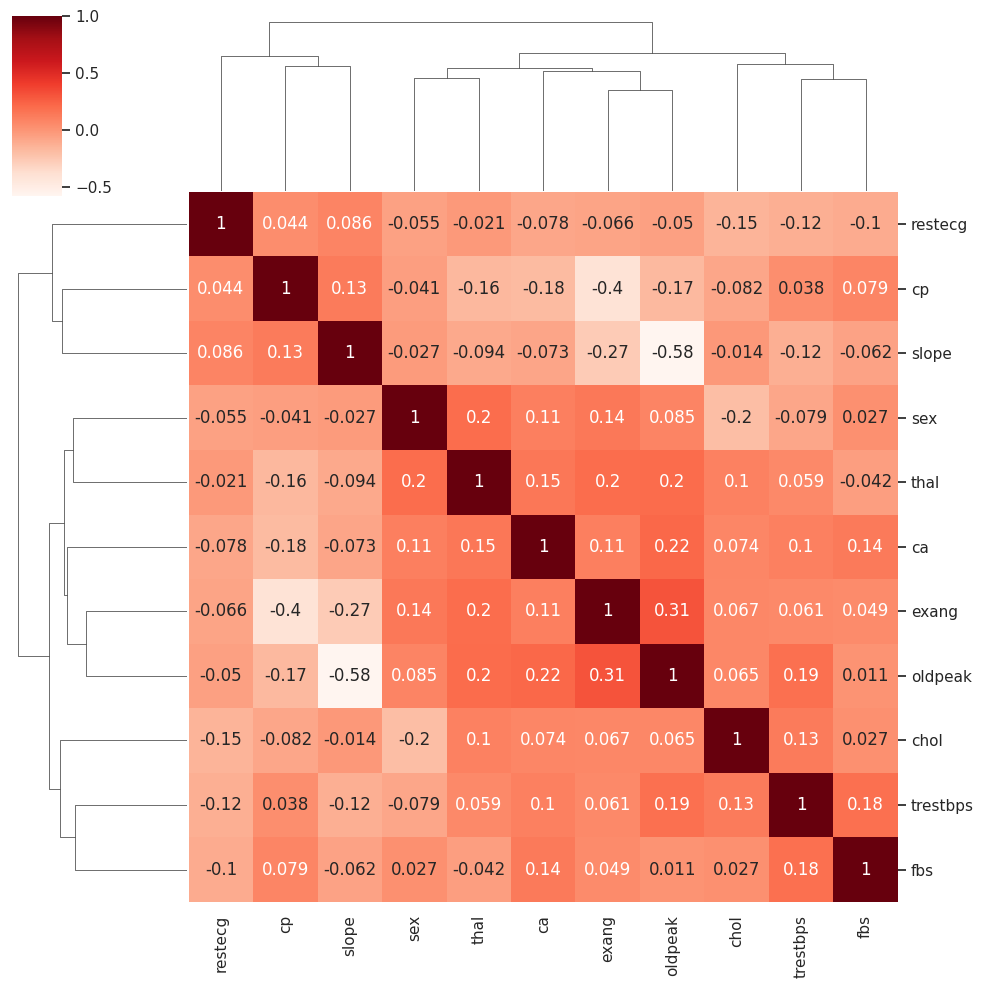

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#Computing the correlation matrixm for both scalar and regular
scaled_corr_matrix = scaled_vars.corr()
correlation_matrix= rm_col_data.corr()

#Printing the correlation matrix
print("Correlation Matrix (Scaled Data): ", scaled_corr_matrix)
#Priting Original Matrix want to make sure that the scalar and data before scaling align
print("Correlation for Regular Data: ",correlation_matrix)

#Creatig a heatmap
sns.clustermap(scaled_corr_matrix, cmap='Reds',annot=True)
plt.show()


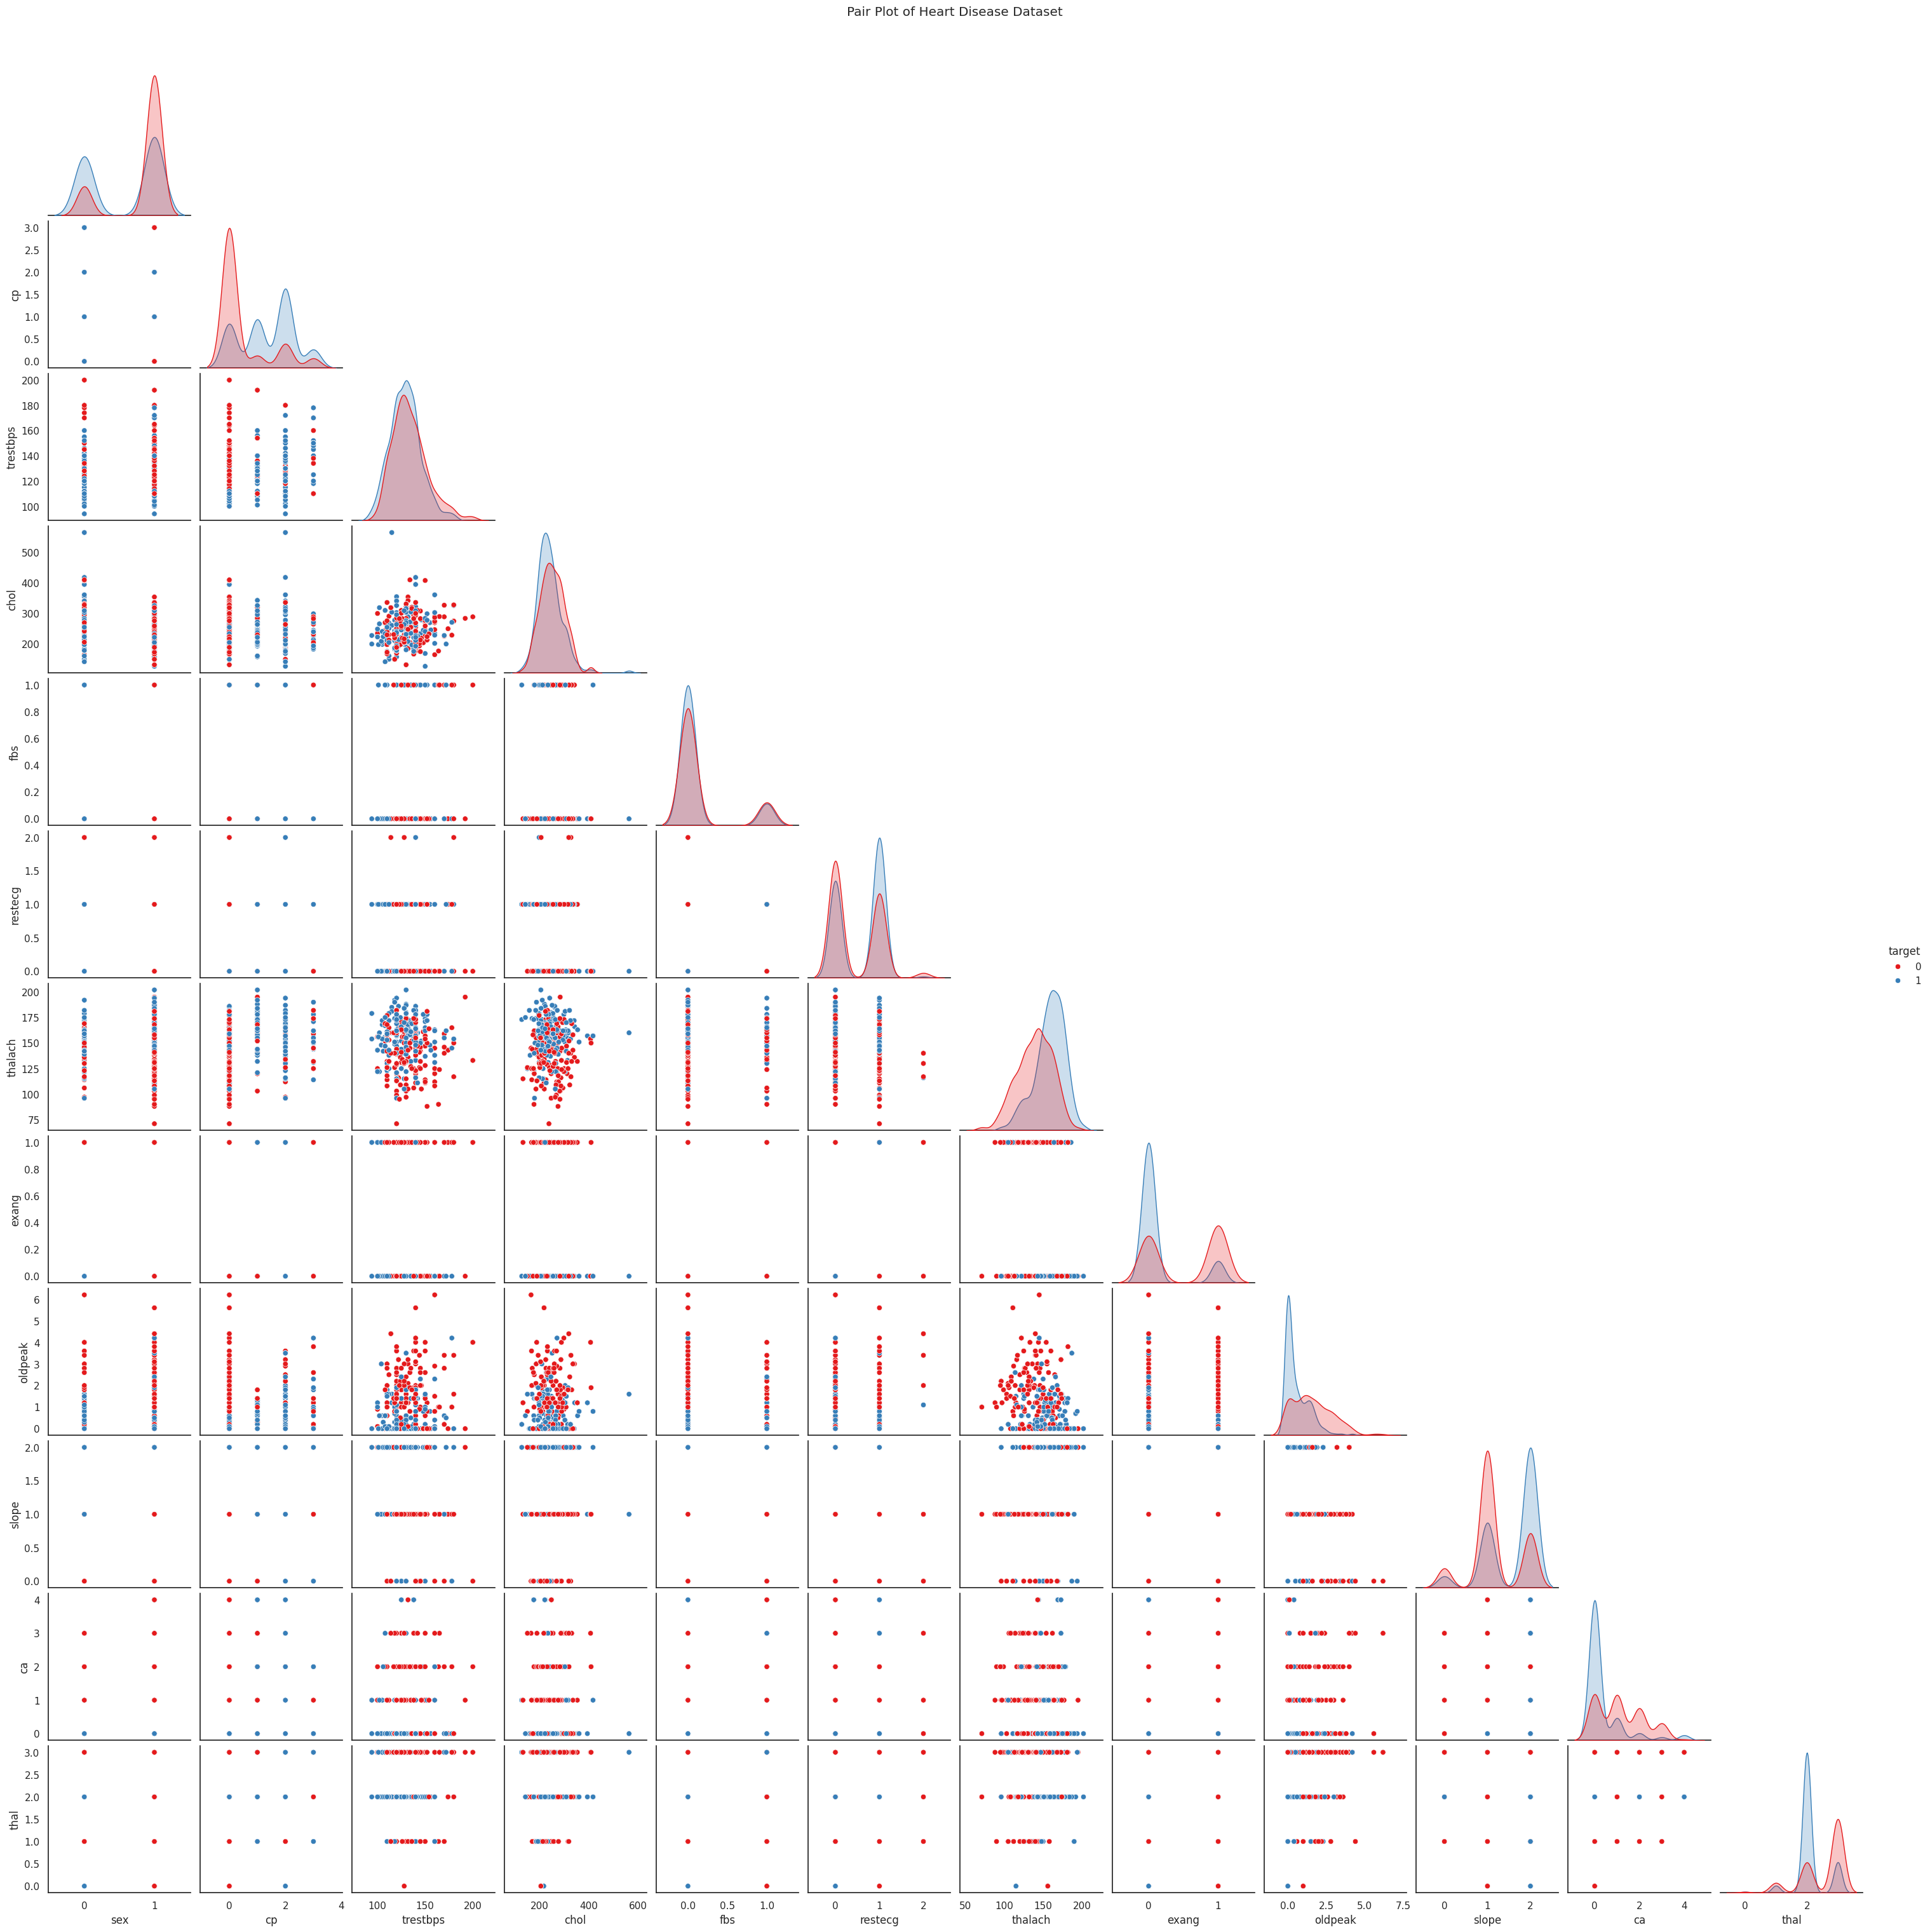

In [50]:
sns.pairplot(data,diag_kind='kde',corner=True,hue='target',palette='Set1')

plt.suptitle("Pair Plot of Heart Disease Dataset", y=1.02)
plt.show()


# Task 3

1. Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.
2. Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their
convergence properties with respect to your cost function.
(Refer to the research paper discussed in class; you may add additional research too).

Task 3 Question 1 and 2

In [93]:
#Features: all columns except 'target'
feats = data.drop('target', axis=1).values
#Target: 'target' column
y = data['target'].values.reshape(-1, 1)

#I know I scaled earlier but this scales the feats instead giving me no error
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(feats)

#This was for debugging to make sure it worked
#print("\nFeatures after scaling (first five rows):")
#rint(scaled_vars[:5])

#Weights and Bias
weight = np.zeros((scaled_vars.shape[1], 1))
bias = 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Binary Cross Entropy
def bce(weight, bias, feats, y):
    n = feats.shape[0]
    z = np.dot(feats, weight) + bias
    pi = sigmoid(z)
    #Small epsilon to avoid log(0) because originally I got an error
    eps = 1e-10
    #Log Loss: https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/
    cost = -(1/n) * np.sum(y * np.log(pi + eps) + (1 - y) * np.log(1 - pi + eps))

    return cost

#Gradient for Logistic Regression
def batch_gradient_descent(weight, bias, feats, y):
    m = feats.shape[0]

    #Fwd Pass
    z = np.dot(feats, weight) + bias
    a = sigmoid(z)

    #Gradient for weights using dot product across all the examples
    gradientweight = (1/m) * np.dot(feats.T, (a - y))
    #Gradient for bias(doesnt need np dot because it is a scalar)
    gradientbias = (1/m) * np.sum(a - y)

    return gradientweight, gradientbias


def training_bgd(weight, bias, feats, y, learning_rate=0.01, iterations=1000):
    #Keeping list of all the costs.
    costarr = []
    for i in range(iterations):
        gradientweight, gradientbias = batch_gradient_descent(weight, bias, feats, y)

        #Training over a loop and updating weight and bias
        weight = weight - learning_rate * gradientweight
        bias   = bias   - learning_rate * gradientbias

        #Finging the Cost with Binary Cross Entropy
        cost = bce(weight, bias, feats, y)
        costarr.append(cost)

        #Debugging to make sure it worked
        #if (i+1) % 100 == 0:
         #   print(f"Batch GD Iteration {i+1}/{iterations}, Cost: {cost:.4f}")

    return weight, bias, cost_history


def vanilla_stochastic_gradient_descent(weight, bias, feats, y, learning_rate, epochs):
    m = feats.shape[0]
    costarr = []

    for epoch in range(epochs):
        #Shuffling data indices for each epoch
        indices = np.random.permutation(m)

        for i in indices:
            #Single sample and target
            x_i = feats[i].reshape(1, -1)
            y_i = y[i].reshape(-1, 1)

            #Fwd pass again
            z = np.dot(x_i, weight) + bias
            a = sigmoid(z)

            #Gradients for 1 sample
            gradientweight = np.dot(x_i.T, (a - y_i))
            gradientbias = np.sum(a - y_i)

            #Updating weight and bias in iteration
            weight = weight - learning_rate * gradientweight
            bias = bias - learning_rate * gradientbias

        #Computing cost over the entire dataset at end of each epoch
        cost = bce(weight, bias, feats, y)
        costarr.append(cost)
        #print(f"Stochastic GD Epoch {epoch+1}/{epochs}, Cost: {cost:.4f}")

    return weight, bias, costarr


def mini_batch_gradient_descent(weight, bias, feats, y, learning_rate, epochs, batch_size):
    costarr = []
    n = feats.shape[0]

    for itr in range(epochs):
        #Shuffling data each epoch
        indices = np.random.permutation(n)
        feats_shuffled = feats[indices]
        y_shuffled = y[indices]

        #Splitting into mini-batches
        for i in range(0, n, batch_size):
            X_minibatch = feats_shuffled[i:i+batch_size]
            y_minibatch = y_shuffled[i:i+batch_size].reshape(-1, 1)

            #Fwd Pass on X_minibatch
            z_minibatch = np.dot(X_minibatch, weight) + bias
            predictions = sigmoid(z_minibatch)

            #Computing Cost on mini-batch
            mini_batch_cost = bce(weight, bias, X_minibatch, y_minibatch)

            #Updating Gradients
            dw_mini = (1/len(X_minibatch)) * np.dot(X_minibatch.T, (predictions - y_minibatch))
            db_mini = (1/len(X_minibatch)) * np.sum(predictions - y_minibatch)

            #Updating Parameters
            weight = weight - learning_rate * dw_mini
            bias = bias - learning_rate * db_mini

        #Tracking cost after each full epoch
        cost = bce(weight, bias, feats, y)
        costarr.append(cost)
        #print(f"Mini-Batch GD Epoch {itr+1}/{epochs}, Cost: {cost:.4f}")

    return weight, bias, costarr


#Running Batch Gradient Descent
print("Running Batch Gradient Descent ")
w_batch, b_batch, cost_batch = training_bgd(
    weight.copy(),
    bias,
    scaled_vars,
    y,
    learning_rate=0.01,
    iterations=1000
)

#Running Stochastic Gradient Descent
print("Running Stochastic Gradient Descent ")
w_sgd, b_sgd, cost_sgd = vanilla_stochastic_gradient_descent(
    weight.copy(),
    bias,
    scaled_vars,
    y,
    learning_rate=0.01,
    epochs=10
)

#Running Mini-Batch Gradient Descent
print("Running Mini-Batch Gradient Descent \n")
w_mbgd, b_mbgd, cost_mbgd = mini_batch_gradient_descent(
    weight.copy(),
    bias,
    scaled_vars,
    y,
    learning_rate=0.01,
    epochs=10,
    batch_size=32
)


print("Final Cost:")
print(f"Final Batch GD Cost: {cost_batch[-1]:.4f}")
print(f"Final Stochastic GD Cost: {cost_sgd[-1]:.4f}")
print(f"Final Mini-Batch GD Cost: {cost_mbgd[-1]:.4f}")


Running Batch Gradient Descent 
Running Stochastic Gradient Descent 
Running Mini-Batch Gradient Descent 

Final Cost:
Final Batch GD Cost: 0.3519
Final Stochastic GD Cost: 0.3511
Final Mini-Batch GD Cost: 0.4078


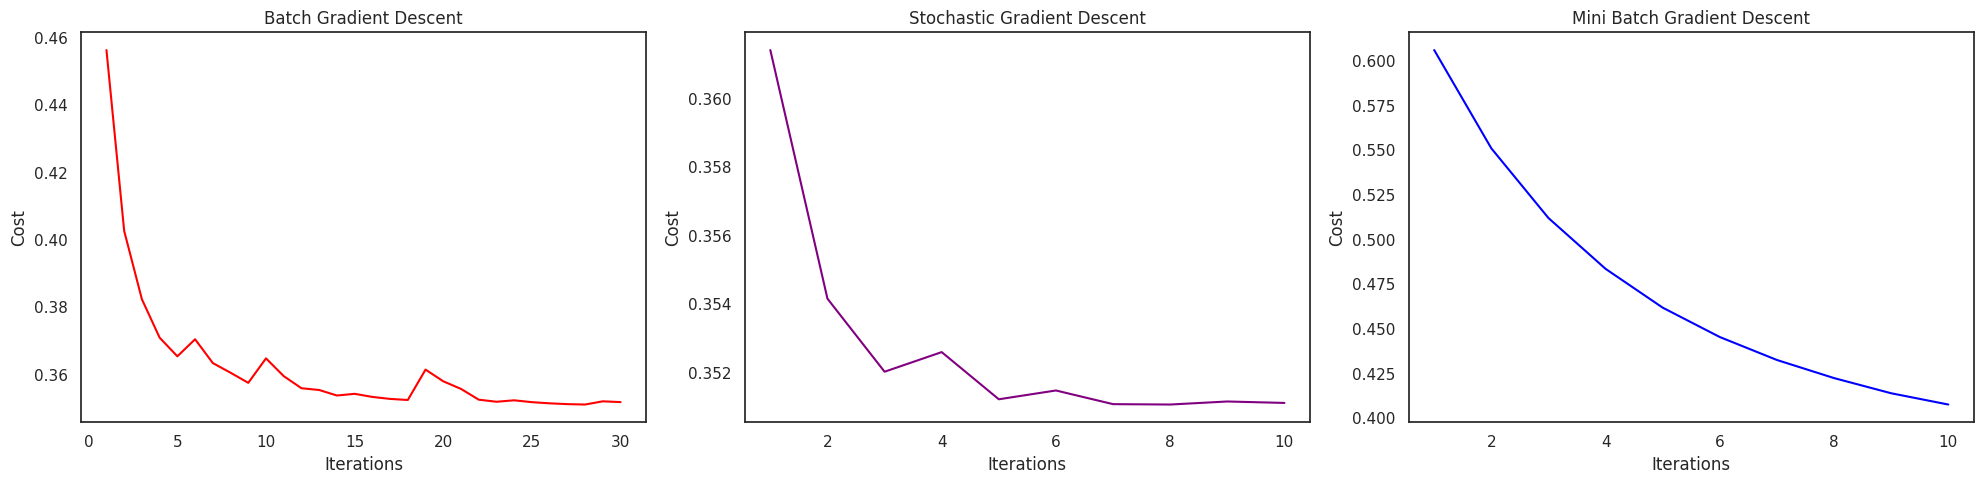

In [97]:
#Mapping to illustrate that it is working properly
#As well as convergence
import matplotlib.pyplot as plt

#Plotting Batch Gradient Descent Cost History
plt.figure(figsize=(20, 5))

#Doing the plots together
plt.subplot(1, 3, 1)
#Plotting the data for BGD
plt.plot(range(1, len(cost_batch)+1), cost_batch, color='red')
plt.title('Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')

#Plotting Stochastic Gradient Descent Cost History
plt.subplot(1, 3, 2)
plt.plot(range(1, len(cost_sgd)+1), cost_sgd, color='purple')
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')

#Plotting Mini-Batch Gradient Descent Cost History
plt.subplot(1, 3, 3)
plt.plot(range(1, len(cost_mbgd)+1), cost_mbgd, color='blue')
plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


While going over 1000 iterations, it seems that batch gradient descent shows steady convergence which is helping to reduce the cost in a consistent manner. This stability ensures reliable updates.

For the SGD model that has been made, it had a very low final cost within thr 10 epochs it ran for showing how efficient it is as well. Even with some noise, it minimized the cost quickly due to its updates that come more frequently.

As for the mini-batch gradient descent, it shows that it ended with a higher cost which could be due to the batch size I have chosen.

Overall, the SGD Model outperformed while the batch gradient descent illustrated steady results making it a safer route for smaller datasets.

# Task 4
1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.
2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.
3. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your
sources.
4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.

Task 4: Question 1

In [80]:
#Momentum Algorithm
#Referencing from here https://www.geeksforgeeks.org/ml-momentum-based-gradient-optimizer-introduction/

def momentum_alg(weight, bias, feats, y, learning_rate, beta, iterations):
    #Initialize velocity for weights and bias
    velocityweight = np.zeros_like(weight)  # Velocity for weights
    velocitybias = 0  # Velocity for bias

    costarr= []

    #Looping
    for i in range(iterations):
        #Computing gradients (returns dw, db)
        gradientweight, gradientbias = batch_gradient_descent(weight, bias, feats, y)

        #Computing cost (binary cross-entropy)
        cost = bce(weight, bias, feats, y)

        #Updating velocity for weights and bias
        #I have updated both weight and bias

        #The beta is to control the momentum
        velocityweight = beta * velocityweight + (1 - beta) * gradientweight
        velocitybias = beta * velocitybias + (1 - beta) * gradientbias

        #Updating params using the velocity
        #Folloiwng the "x=x-alpha*v" for both weight and bias
        weight = weight - learning_rate * velocityweight
        bias = bias - learning_rate * velocitybias

        # Track cost history
        costarr.append(cost)

    return weight, bias, costarr




Task 4: Question 2

In [81]:
# Prediction function
def predict(weight, bias, feats):
    z = np.dot(feats, weight) + bias
    a = sigmoid(z)
    #Predicted probabilities
    return a

#Converting probabilities to binary outcomes using a threshold (0.5)
def evaluate_model(weight, bias, feats, y_true):
    predictions = predict(weight, bias, feats)
    predictions_binary = (predictions >= 0.5).astype(int)  # Binary prediction

    #Calculating precision, recall, and F1 score
    precision = precision_score(y_true, predictions_binary)
    recall = recall_score(y_true, predictions_binary)
    f1 = f1_score(y_true, predictions_binary)

    return precision, recall, f1

w_momentum, b_momentum, cost_hist_momentum = momentum_alg(
    weight.copy(),
    bias,
    scaled_vars,
    y,
    #Similar to the alpha
    learning_rate=0.01,
    beta=0.9,
    iterations=1000
)

#BGD
precision_batch, recall_batch, f1_batch = evaluate_model(w_batch, b_batch, scaled_vars, y)
print(f"Batch GD - Precision: {precision_batch:.4f}, Recall: {recall_batch:.4f}, F1 Score: {f1_batch:.4f}")

#SGD
precision_sgd, recall_sgd, f1_sgd = evaluate_model(w_sgd, b_sgd, scaled_vars, y)
print(f"Stochastic GD - Precision: {precision_sgd:.4f}, Recall: {recall_sgd:.4f}, F1 Score: {f1_sgd:.4f}")

#Mini Batch
precision_mbgd, recall_mbgd, f1_mbgd = evaluate_model(w_mbgd, b_mbgd, scaled_vars, y)
print(f"Mini-Batch GD - Precision: {precision_mbgd:.4f}, Recall: {recall_mbgd:.4f}, F1 Score: {f1_mbgd:.4f}")

#Momentum
precision_momentum, recall_momentum, f1_momentum = evaluate_model(w_momentum, b_momentum, scaled_vars, y)
print(f"Momentum - Precision: {precision_momentum:.4f}, Recall: {recall_momentum:.4f}, F1 Score: {f1_momentum:.4f}")


Batch GD - Precision: 0.8105, Recall: 0.9106, F1 Score: 0.8577
Stochastic GD - Precision: 0.8239, Recall: 0.9163, F1 Score: 0.8677
Mini-Batch GD - Precision: 0.8114, Recall: 0.9240, F1 Score: 0.8640
Momentum - Precision: 0.8105, Recall: 0.9106, F1 Score: 0.8577


Task 4: Question 3

In [96]:
#Using Grid Search Implementation for this
#I used something along this line in which I search through the parameters I have made
#https://towardsdatascience.com/grid-search-in-python-from-scratch-hyperparameter-tuning-3cca8443727b
#Hyperparameters grid for learning rate and batch size
param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'epochs': [10, 20, 30, 40, 50],
    'beta': [0.5, 0.7, 0.8, 0.9],
    'batch_size': [16, 32, 64, 96]
}

#Evaulating based on the parameters given
def evaluate_model(weight, bias, feats, y, learning_rate, beta, epochs, batch_size=None):
    #Running Batch Gradient Descent
    if batch_size is None:
        #For BGD and Momentum to run
        w, b, cost_history = training_bgd(weight.copy(), bias, feats, y, learning_rate, epochs)
    else:
        #For SGD and Mini-Batch to run
        w, b, cost_history = mini_batch_gradient_descent(weight.copy(), bias, feats, y, learning_rate, epochs, batch_size)

    #Predicting here
    predictions = (sigmoid(np.dot(feats, w) + b) >= 0.5).astype(int)

    #Computing evaluation metrics for the results
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)

    return precision, recall, f1, cost_history

#Grid searching over hyperparameters that I have made
#Setting no best param so far
best_params = None
#Also tracking best F-1 Score as well
best_f1 = 0
#Ensuring that it goes over all the parameters given
for learning_rate in param_grid['learning_rate']:
    for beta in param_grid['beta']:
        for epochs in param_grid['epochs']:
            for batch_size in param_grid['batch_size']:
                #Tuning for BGD, SGD, and Mini-Batch GD
                precision, recall, f1, cost_history = evaluate_model(
                    weight, bias, scaled_vars, y, learning_rate, beta, epochs, batch_size
                )

                #If best F1 score: store params
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {
                        'learning_rate': learning_rate,
                        'beta': beta,
                        'epochs': epochs,
                        'batch_size': batch_size
                    }

print("Best Hyperparameters are the following: ", best_params)


Best Hyperparameters are the following: {'learning_rate': 0.05, 'beta': 0.8, 'epochs': 10, 'batch_size': 64}


Task 4: Question 4


Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets

Answer:
Stochastic Gradient Descent updates its parameters using a single training sample at a time. This makes is computationally efficient for larger datasets. It also is a bit faster than BGD in terms of iterations to converge. In terms of stability it is a bit less stable as its drawback. Because it has this noisy feature to it, it is good for real time applications. Due to the speed of this algorithm, it holds a good choice to use for a dataset but would need to be properly tuned.

For MiniBatch Gradient Descent, it has a good balance between stability batch gradient descent and holds the efficiency of an Stochastic gradient descent. It is able to process pieces of data at a time giving it those two perks. With its batches, it still requires tuning of its batch sizes and learning rates.

For Batch Gradient Descent, it computes the gradient using the entire dataset at once. The downfall of BGD is the fact that it is computationally expensive especially if the dataset is larger. It is a very straightforward algorithms since it is easier to track the weights in an algorithm like this.

Lastly, momentum is just an add on to the stocastic gradient descent that utilizes a moving average to update weights. The velocity in the formula gives the algorithm an additional parameter which can be tuned which can affect the results. It can be useful for larger datasets as it speeds the convergence without creating a heavy computational cost to the algorithm, but has to be tuned properly.